## DECISION TREE

In [1]:
# Importing the libraries

import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

In [2]:
# ingnoring warning

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset

df=pd.read_csv('alzheimer.csv')
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
# Shape

print('Shape: ',df.shape)

Shape:  (373, 10)


### FUTURE ENGINEERING

In [5]:
# Checking removing null values

df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [6]:
# Replacing missing values with median

df.fillna(df.median(), inplace=True)

df.isnull().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [7]:
# Shape after replacing missing values


print('Shape: ',df.shape)

Shape:  (373, 10)


In [8]:
# Checking duplicated values

df.duplicated().sum()

0

In [9]:
# Using label encoder on target feature

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Group']=le.fit_transform(df['Group']).astype(int)
df['M/F']=le.fit_transform(df['M/F']).astype(int)
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [10]:
# Checking dtype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int32  
 1   M/F     373 non-null    int32  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 26.4 KB


In [11]:
# Splitting the data into x and y

X=df.drop(columns='Group', axis=1)
y=df.loc[:,'Group']

In [12]:
# Shape of X and Y


X.shape, y.shape

((373, 9), (373,))

In [13]:
# DF of X

X.head()

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [14]:
y.head()

0    2
1    2
2    1
3    1
4    1
Name: Group, dtype: int32

In [15]:
# Since data is imbalanced
# Trying over sampling

from imblearn.over_sampling import RandomOverSampler

rs=RandomOverSampler()
X,y=rs.fit_resample(X,y)

In [16]:
# Shape after over sampling

X.shape, y.shape

((570, 9), (570,))

### MODEL DEPLOYMENT

In [17]:
### Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((399, 9), (171, 9), (399,), (171,))

In [18]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
# y_predict

y_predict=dt.predict(X_test)

In [20]:
# metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

accuracy=accuracy_score(y_test,y_predict)
cr=classification_report(y_test,y_predict)
cm=confusion_matrix(y_test,y_predict)

print('accuracy: {}\n\n\nclassification report:\n {}\n\n\nconfusion matrix:\n {}'.format(accuracy*100,cr,cm))

accuracy: 93.56725146198829


classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.97      0.98      0.98        60
           2       1.00      0.85      0.92        59

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



confusion matrix:
 [[51  1  0]
 [ 1 59  0]
 [ 8  1 50]]


Confusion matrix:
[[51  1  0]
 [ 1 59  0]
 [ 8  1 50]]


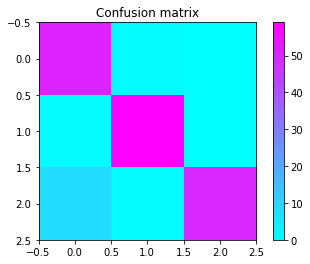

In [21]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, y_predict)
print('Confusion matrix:')
print(cm)
plot_confusion_matrix(cm)